In [1209]:
import pandas as pd
import seaborn as sns

In [1210]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1211]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [1212]:
training_set_labels=pd.read_csv("Training set labels.csv",index_col=["id"])
training_set_values=pd.read_csv("Training set values.csv",index_col=["id"])
test_set_values=pd.read_csv("Test set values.csv",index_col=["id"])

In [1213]:
training_set=training_set_values.join(training_set_labels)

In [1214]:
training_set.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [1215]:
test_set_values.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [1216]:
print("Training set:")
print("Nan values:\n")
print(training_set.isna().sum())
print("\n")
print("dupliacte rows:\n")
print(training_set.duplicated().sum())

Training set:
Nan values:

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_grou

In [1217]:
print("Testing set:")
print("Nan values:\n")
print(test_set_values.isna().sum())
print("\n")
print("dupliacte rows:\n")
print(test_set_values.duplicated().sum())

Testing set:
Nan values:

amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity      

In [1218]:
training_set.dtypes

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

In [1219]:
training_set.drop_duplicates(inplace = True)

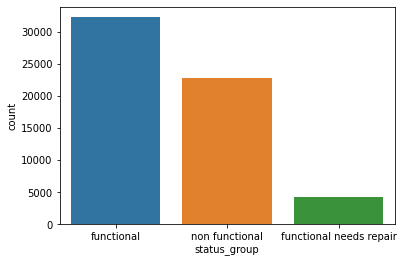

In [1220]:
 sns.countplot(x="status_group", data=training_set)

**Impute NAN values**

In [1221]:
#group by 2 cols and fill nan values from mode
def fill(mode):
    if(type(mode).__module__=="numpy"):
        if(mode.size==0):
          return "Other"
        else:
          return mode[0]
    else:
        return mode
def fill_categorical_cols_2(df,col,grp_by):
  mode=df.groupby(grp_by)[col].agg(pd.Series.mode)
  grp=grp_by+[col]
  df[col]=df[grp].apply(lambda row: fill(mode[row[0],row[1]]) if pd.isna(row[2]) else row[2],axis=1)

In [1222]:
#group by 1 cols and fill nan values from mode
def fill_categorical_cols_1(df,col,grp_by):
  mode=df.groupby(grp_by)[col].agg(pd.Series.mode)
  grp=grp_by+[col]
  df[col]=df[grp].apply(lambda row: fill(mode[row[0]]) if pd.isna(row[1]) else row[1],axis=1)

In [1223]:
fill_categorical_cols_2(training_set,"funder",["region_code","district_code"])
fill_categorical_cols_2(test_set_values,"funder",["region_code","district_code"])

In [1224]:
fill_categorical_cols_1(training_set,"installer",["funder"])
fill_categorical_cols_1(test_set_values,"installer",["funder"])

In [1225]:
fill_categorical_cols_1(training_set,"subvillage",["ward"])
fill_categorical_cols_1(test_set_values,"subvillage",["ward"])

In [1226]:
fill_categorical_cols_1(training_set,"public_meeting",["ward"])
fill_categorical_cols_1(test_set_values,"public_meeting",["ward"])

In [1227]:
fill_categorical_cols_1(training_set,"scheme_management",["funder"])
fill_categorical_cols_1(test_set_values,"scheme_management",["funder"])

In [1228]:
fill_categorical_cols_1(training_set,"scheme_name",["funder"])
fill_categorical_cols_1(test_set_values,"scheme_name",["funder"])

In [1229]:
fill_categorical_cols_1(training_set,"permit",["funder"])
fill_categorical_cols_1(test_set_values,"permit",["funder"])

**Create new features**

In [1230]:
def year(row):
  return row.split("-")[0]
# def month(row):
#   return row.split("-")[1]
# def day(row):
#   return row.split("-")[2]
def date_extract(df):
  df["date_recorded_year"]=df[["date_recorded"]].apply(lambda row:year(row[0]),axis=1)
  # df["date_recorded_month"]=df[["date_recorded"]].apply(lambda row:month(row[0]),axis=1)
  # df["date_recorded_day"]=df[["date_recorded"]].apply(lambda row:day(row[0]),axis=1)

In [1231]:
date_extract(training_set)
date_extract(test_set_values)

In [1232]:
def recorded_and_construction_year_differnce(df):
      df["recorded_and_construction_year_differnce"]=df[["construction_year","date_recorded_year"]].apply(lambda row:int(row[1])-int(row[0]) if int(row[1])-int(row[0])>=0 else 0,axis=1)

In [1233]:
recorded_and_construction_year_differnce(training_set)
recorded_and_construction_year_differnce(test_set_values)

In [1234]:
training_set.drop(["date_recorded","construction_year","date_recorded_year"], axis=1,inplace=True)
test_set_values.drop(["date_recorded","construction_year","date_recorded_year"], axis=1,inplace=True)

**extract and alter features**

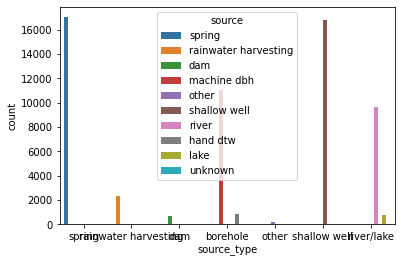

In [1235]:
# source and source_type
sns.countplot(x="source_type", hue="source",data=training_set)

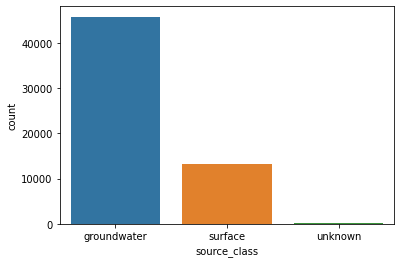

In [1236]:
sns.countplot(x="source_class",data=training_set)

In [1237]:
def extraction_type(e_t):
    if("-" in e_t):
        return e_t.split("-")[1].strip()
    elif("ii" in e_t or "iii" in e_t):
        return " ".join(e_t.split(" ")[0:2])
    elif("80" in e_t or "81" in e_t ):
        return e_t.split(" ")[0]
    else:
      return e_t
def process_extraction_type(df):
  df["extraction_type"]=df[["extraction_type"]].apply(lambda row:extraction_type(row[0]),axis=1)

In [1238]:
process_extraction_type(training_set)
process_extraction_type(training_set)
process_extraction_type(test_set_values)
process_extraction_type(test_set_values)

In [1239]:
def unkown_to_other(df,feature):
  df[feature]=df[[feature]].apply(lambda row:"other" if row[0]=="unknown" else row[0],axis=1)

In [1240]:
unkown_to_other(training_set,"source_class")
unkown_to_other(training_set,"source")
unkown_to_other(test_set_values,"source_class")
unkown_to_other(test_set_values,"source")

In [1241]:
def extraction_type_group(e_t):
    if("handpump" in e_t):
        return "handpump"
    elif("motorpump" in e_t):
        return "motorpump"
    elif("ii" in e_t or "iii" in e_t):
        return " ".join(e_t.split(" ")[0:2])
    elif("80" in e_t or "81" in e_t ):
        return e_t.split(" ")[0]
    else:
      return e_t
def process_extraction_type_group(df):
  df["extraction_type_group"]= df[["extraction_type_group"]].apply(lambda row:extraction_type_group(row[0]),axis=1)

In [1242]:
process_extraction_type_group(training_set)
process_extraction_type_group(test_set_values)

**Normalization**

In [1243]:
#normalization
import numpy as np
def normalize_log(df,feature):
  df[feature]=df[[feature]].apply(lambda row:row[0]+1 ,axis=1)
  df[feature]=np.log(df[feature])
def normalize_to_zero(df,feature):
  df[feature]=df[[feature]].apply(lambda row:row[0]+abs(df[feature].min()),axis=1)

In [1244]:
normalize_log(training_set,"amount_tsh")
normalize_log(training_set,"population")
normalize_log(test_set_values,"amount_tsh")
normalize_log(test_set_values,"population")
normalize_to_zero(training_set,"gps_height")
normalize_to_zero(test_set_values,"gps_height")
normalize_log(training_set,"gps_height")
normalize_log(test_set_values,"gps_height")
normalize_log(training_set,"recorded_and_construction_year_differnce")
normalize_log(test_set_values,"recorded_and_construction_year_differnce")

In [1245]:
def funder(fun):
  fun=fun.upper()
  if ("0" in fun):
    fun=fun.replace("0","O")
  if("/" in fun):
    fun_list=fun.split("/")
    for i in range(len(fun_list)):
        fun_list[i]=fun_list[i].strip()
    return " ".join(fun_list)
  elif("GVT" in fun):
      fun=fun.replace("GVT","GOVERNMENT")
      return fun
  elif("GOVT" in fun):
      fun=fun.replace("GOVT","GOVERNMENT")
      return fun
  elif("GOVER" in fun):
      fun=fun.replace("GOVER","GOVERNMENT")
      return fun
  elif("-" in fun):
      fun=fun.replace("-"," ")
      return fun
  elif(" " in fun):
    new_fun_list=[]
    fun_list=fun.split(" ")
    for i in range(len(fun_list)):
        if(fun_list[i].strip()=="CO" or "CO." in fun_list[i].strip()):
            break
        else:
          new_fun_list.append(fun_list[i].strip())
    return " ".join(new_fun_list)
  else:
    return fun

def process_funder(df):
  df["funder"]= df[["funder"]].apply(lambda row:funder(row[0]),axis=1)

In [1246]:
process_funder(training_set)
process_funder(test_set_values)

In [1247]:
def installer(inst):
  inst=inst.upper()
  if(inst=="-"):
    return "NONE"
  elif("/" in inst):
    inst_list=inst.split("/")
    for i in range(len(inst_list)):
      inst_list[i]=inst_list[i].strip()
    return " ".join(inst_list)
  elif("GVT" in inst ):
      inst=inst.replace("GVT","GOVERNMENT")
      return inst
  elif("GOVT" in inst):
      inst=inst.replace("GOVT","GOVERNMENT")
      return inst
  elif(" " in inst):
    new_inst_list=[]
    inst_list=inst.split(" ")
    for i in range(len(inst_list)):
        if(inst_list[i].strip()=="CO" or "CO." in inst_list[i].strip()):
            break
        else:
          new_inst_list.append(inst_list[i].strip())
    return " ".join(new_inst_list)
  else:
    return inst

def process_intaller(df):
  df["installer"]= df[["installer"]].apply(lambda row:installer(row[0]),axis=1)

In [1248]:
process_intaller(training_set)
process_intaller(test_set_values)

In [1249]:
#replace and remove space,"-","_"and "." etc..
def _replace(val):
    if("\\" in val):
      val=val.replace("\\"," ")
    if("." in val):
      val=val.replace("."," ")
    if("_" in val):
      val=val.replace("_"," ") 
    if("-" in val):
      val=val.replace("-"," ") 
    return val
    
def _remove(val,start,end):
    if(" " in val):
      new_val_list=[]
      val_list=val.split(" ")
      start=max(start,0)
      end=min(end,len(val_list))
      for i in range(start,end):
        new_val_list.append(val_list[i].strip())
      return "".join(new_val_list)
    else:
      return val
def replace_and_remove(df,feature,start,end):
  df[feature]= df[[feature]].apply(lambda row:_replace(row[0]),axis=1)
  df[feature]= df[[feature]].apply(lambda row:_remove(row[0],start,end),axis=1)

In [1250]:
replace_and_remove(training_set,"installer",0,3)
replace_and_remove(test_set_values,"installer",0,3)
replace_and_remove(training_set,"funder",0,3)
replace_and_remove(test_set_values,"funder",0,3)

In [1251]:
#drop new duplicates originated beacuse of featue impute
training_set.drop_duplicates(inplace = True)

In [1252]:
training_set.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,recorded_and_construction_year_differnce
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,8.699681,ROMAN,7.300473,ROMAN,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,4.700480,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2.564949
8776,0.000000,GRUMETI,7.306531,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,5.638355,False,GeoData Consultants Ltd,Other,GRUMETI,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1.386294
34310,3.258097,LOTTERYCLUB,6.655440,WORLDVISION,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,5.525453,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,1.609438
67743,0.000000,UNICEF,5.869297,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,4.077537,True,GeoData Consultants Ltd,VWC,wanging'ombe water supply s,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,3.332205
19728,0.000000,ACTIONINA,4.510860,ARTISAN,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0.000000,True,GeoData Consultants Ltd,Other,Other,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,7.606885


In [1253]:
test_set_values.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,recorded_and_construction_year_differnce
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,0.000000,DMDD,7.627544,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,5.774552,True,GeoData Consultants Ltd,Parastatal,Kijiji,True,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,0.693147
51630,0.000000,GOVERNMENTNMENTOFTANZANIA,7.394493,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,5.707110,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,2.639057
17168,0.000000,RUNDUMAN,7.393263,RUNDUMAN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,6.216606,True,GeoData Consultants Ltd,VWC,P,True,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,1.386294
45559,0.000000,FINNWATER,5.783825,FINNWATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,5.525453,True,GeoData Consultants Ltd,VWC,Other,True,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,3.295837
49871,6.216606,BRUDER,7.183871,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,4.110874,True,GeoData Consultants Ltd,Water Board,BRUDER,True,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2.639057


**Train using CatBoost**

In [1254]:
!pip install catboost

In [1255]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [1256]:
X,Y=training_set.loc[:, training_set.columns !="status_group"],training_set["status_group"]

In [1257]:
seed = 42
test_size=0.1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed,stratify=Y)

In [1258]:
model = CatBoostClassifier(verbose=False)
cat_features=["funder","installer","wpt_name","basin","subvillage","region","region_code","district_code","lga","ward","public_meeting","recorded_by","scheme_management","scheme_name","permit",
              "extraction_type","extraction_type_group","extraction_type_class","management","management_group","payment","payment_type","water_quality","quality_group","quantity","quantity_group","source","source_type","source_class","waterpoint_type","waterpoint_type_group"]
model.fit(X_train,Y_train,cat_features=cat_features)

In [1259]:
from sklearn.metrics import accuracy_score
pred=model.predict(X_test)
accuracy_score(Y_test,pred)

0.811193526635199

**Full dataset training**

In [1260]:
full_train_model = CatBoostClassifier(verbose=False)
full_train_model.fit(X,Y,cat_features=cat_features)

In [1261]:
test_set_values["status_group"]=full_train_model.predict(test_set_values)

In [1262]:
test_pred=test_set_values[["status_group"]]
test_pred.to_csv('output_v8.csv', index=True)